## House Price Prediction

### Introduction

### Import Libraries

In [149]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
import os

### Load the data

In [150]:
# load the dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/Venkatalakshmikottapalli/House-Price-Prediction/refs/heads/main/data/raw%20data/House%20SalesUSA%20data.csv')

# print the head of the data
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Data Summary

- **date**: Date the property data was recorded (Data Type: Date)
- **price**: Price of the property (Data Type: Numeric)
- **bedrooms**: Number of bedrooms in the property (Data Type: Numeric)
- **bathrooms**: Number of bathrooms in the property (Data Type: Numeric)
- **sqft_living**: Square footage of the living area (Data Type: Numeric)
- **sqft_lot**: Square footage of the lot (Data Type: Numeric)
- **floors**: Number of floors in the property (Data Type: Numeric)
- **waterfront**: Whether the property is waterfront (1 = yes, 0 = no) (Data Type: Categorical)
- **view**: View quality rating of the property (0-4 scale) (Data Type: Numeric)
- **condition**: Condition of the property (scale 1-5, 1 = poor, 5 = excellent) (Data Type: Numeric)
- **sqft_above**: Square footage of the house excluding the basement (Data Type: Numeric)
- **sqft_basement**: Square footage of the basement area (Data Type: Numeric)
- **yr_built**: Year the property was built (Data Type: Numeric)
- **yr_renovated**: Year the property was renovated (0 = no renovation) (Data Type: Numeric)
- **street**: Street address of the property (Data Type: Categorical)
- **city**: City in which the property is located (Data Type: Categorical)
- **statezip**: State and zip code of the property (Data Type: Categorical)
- **country**: Country in which the property is located (Data Type: Categorical)


### Data Inspection

In [151]:
# shape of dataset
df.shape

(4600, 18)

In [152]:
# Columns of dataset
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [153]:
# Index
df.index

RangeIndex(start=0, stop=4600, step=1)

In [154]:
# sum of duplicates
df.duplicated().sum()

0

In [155]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

### Exploratory Data Analysis

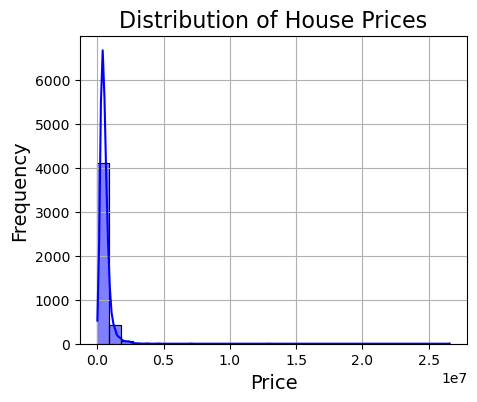

In [156]:
# Plotting the distribution of price
plt.figure(figsize=(5, 4))
sns.histplot(df['price'], kde=True, bins=30, color='blue')
plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


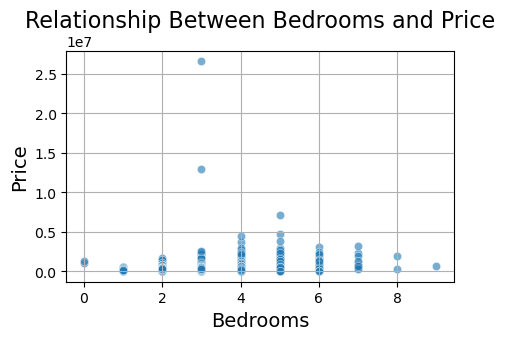

In [157]:
# Plot between price and bedrooms
plt.figure(figsize=(5, 3))
sns.scatterplot(x='bedrooms', y='price', data=df, alpha=0.6)
plt.title(f'Relationship Between Bedrooms and Price', fontsize=16)
plt.xlabel('Bedrooms', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

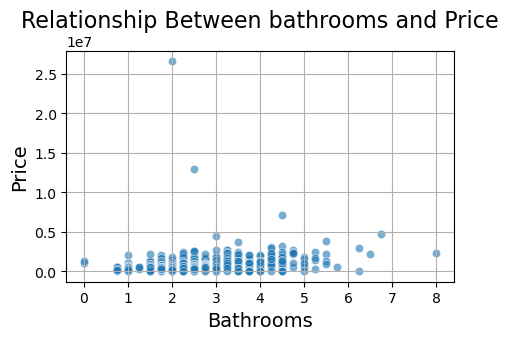

In [158]:
# Plot between price and bathrooms
plt.figure(figsize=(5, 3))
sns.scatterplot(x='bathrooms', y='price', data=df, alpha=0.6)
plt.title(f'Relationship Between bathrooms and Price', fontsize=16)
plt.xlabel('Bathrooms', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

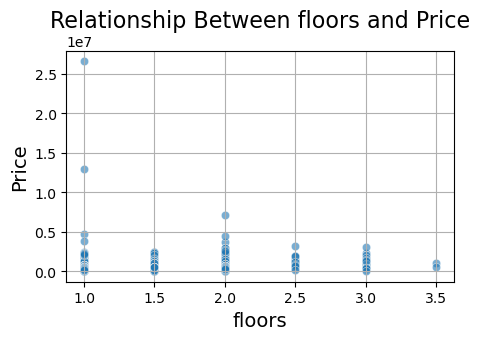

In [159]:
# Plot between price and floors
plt.figure(figsize=(5, 3))
sns.scatterplot(x='floors', y='price', data=df, alpha=0.6)
plt.title(f'Relationship Between floors and Price', fontsize=16)
plt.xlabel('floors', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

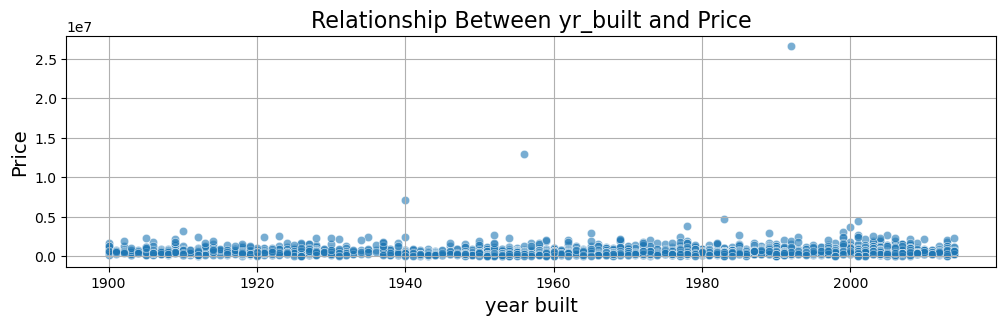

In [160]:
# Plot between price and yr_built
plt.figure(figsize=(12, 3))
sns.scatterplot(x='yr_built', y='price', data=df, alpha=0.6)
plt.title(f'Relationship Between yr_built and Price', fontsize=16)
plt.xlabel('year built', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

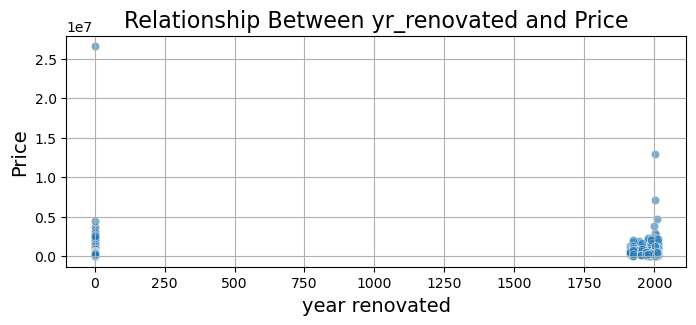

In [161]:
# Plot between price and yr_renovated
plt.figure(figsize=(8, 3))
sns.scatterplot(x='yr_renovated', y='price', data=df, alpha=0.6)
plt.title(f'Relationship Between yr_renovated and Price', fontsize=16)
plt.xlabel('year renovated', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

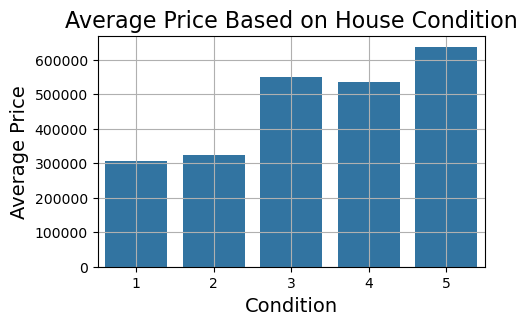

In [162]:
# Plot for price and condition
plt.figure(figsize=(5, 3))
sns.barplot(x='condition', y='price', data=df, errorbar=None)
plt.title('Average Price Based on House Condition', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.grid(True)
plt.show()

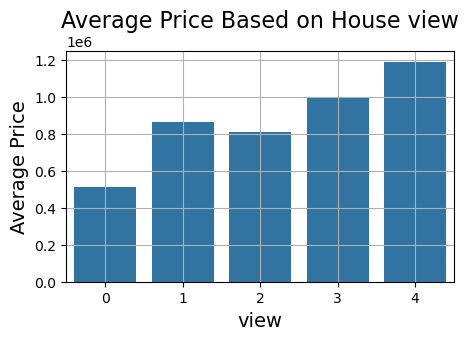

In [163]:
# Plot for price and view
plt.figure(figsize=(5, 3))
sns.barplot(x='view', y='price', data=df, errorbar=None)
plt.title('Average Price Based on House view', fontsize=16)
plt.xlabel('view', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.grid(True)
plt.show()

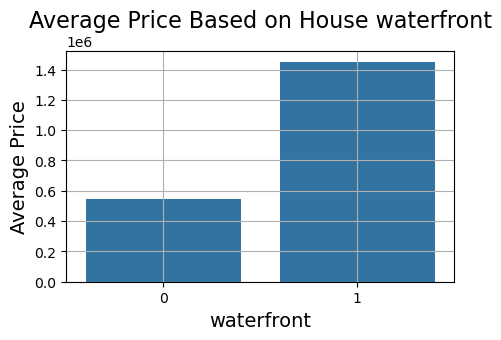

In [164]:
# Plot for price waterfront
plt.figure(figsize=(5, 3))
sns.barplot(x='waterfront', y='price', data=df, errorbar=None)
plt.title('Average Price Based on House waterfront', fontsize=16)
plt.xlabel('waterfront', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.grid(True)
plt.show()

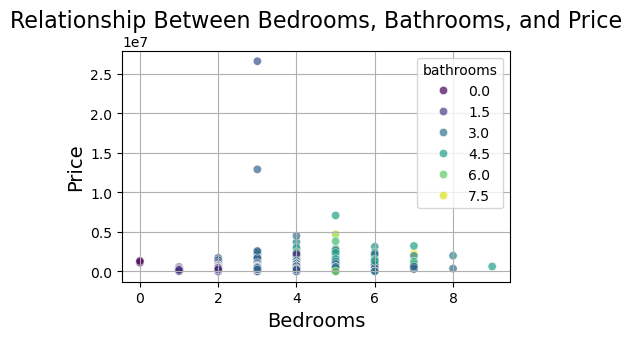

In [165]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='bedrooms', y='price', hue='bathrooms', data=df, palette='viridis', alpha=0.7)
plt.title('Relationship Between Bedrooms, Bathrooms, and Price', fontsize=16)
plt.xlabel('Bedrooms', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

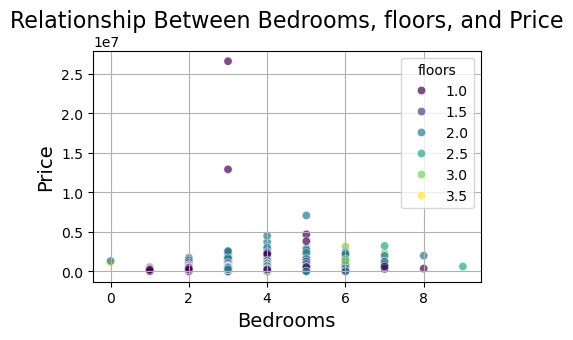

In [166]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='bedrooms', y='price', hue='floors', data=df, palette='viridis', alpha=0.7)
plt.title('Relationship Between Bedrooms, floors, and Price', fontsize=16)
plt.xlabel('Bedrooms', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

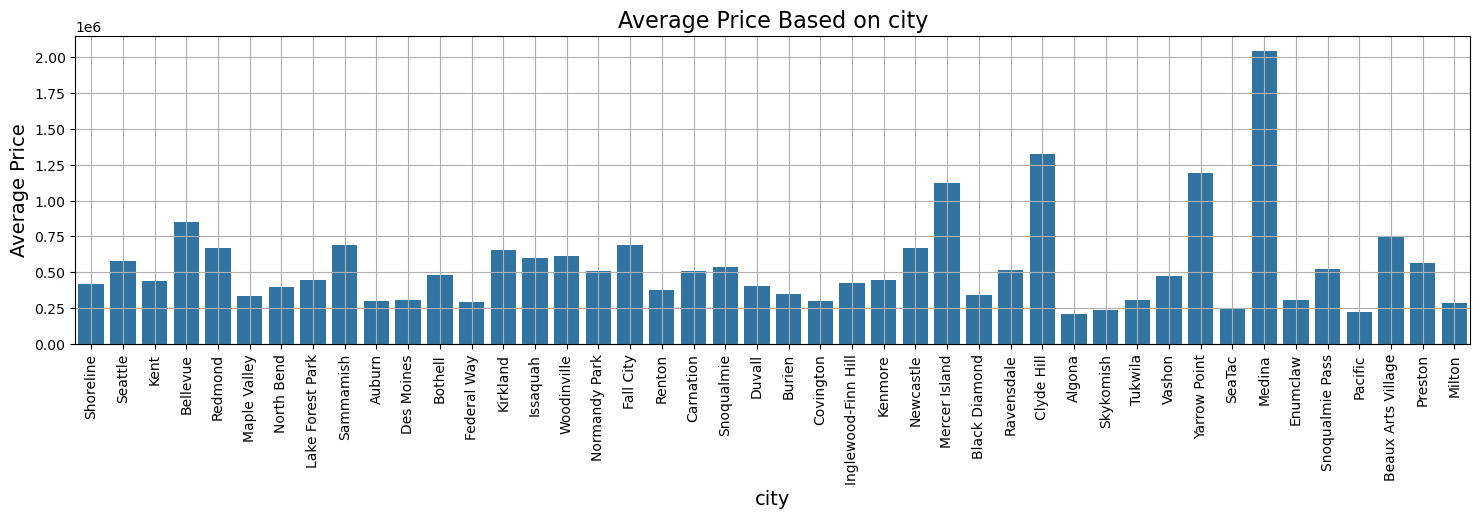

In [167]:
# Plot for price and city
plt.figure(figsize=(18, 4))
sns.barplot(x='city', y='price', data=df, errorbar=None)
plt.title('Average Price Based on city', fontsize=16)
plt.xlabel('city', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### Feature Engineering

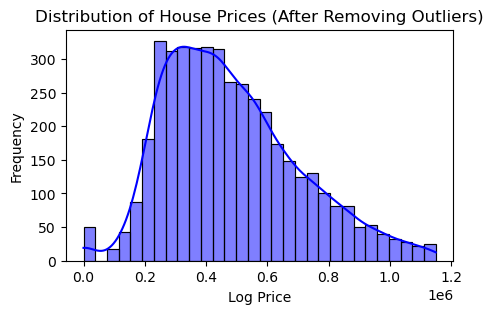

In [168]:
# Calculate IQR
Q1 = df['price'].quantile(0.25)  
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1  

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Plot the cleaned distribution
plt.figure(figsize=(5, 3))
sns.histplot(df['price'], kde=True, color='blue', bins=30)
plt.title("Distribution of House Prices (After Removing Outliers)")
plt.xlabel("Log Price")
plt.ylabel("Frequency")
plt.show()

In [169]:
# Extract date, month, day from date
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['week_of_month'] = df['date'].dt.day // 7 + 1

In [170]:
# get current year
current_year = datetime.now().year
# Creating a new feature 'house_age'
df['house_age'] = current_year - df['yr_built']

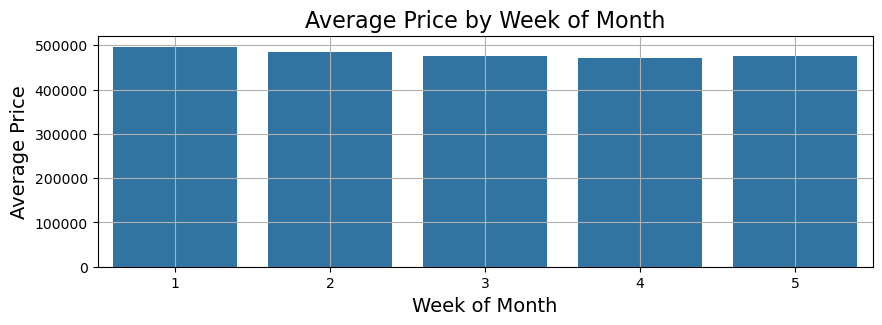

In [171]:
# Bar plot for price vs week of month
plt.figure(figsize=(10, 3))
sns.barplot(x='week_of_month', y='price', data=df, errorbar=None)
plt.title('Average Price by Week of Month', fontsize=16)
plt.xlabel('Week of Month', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.grid(True)
plt.show()

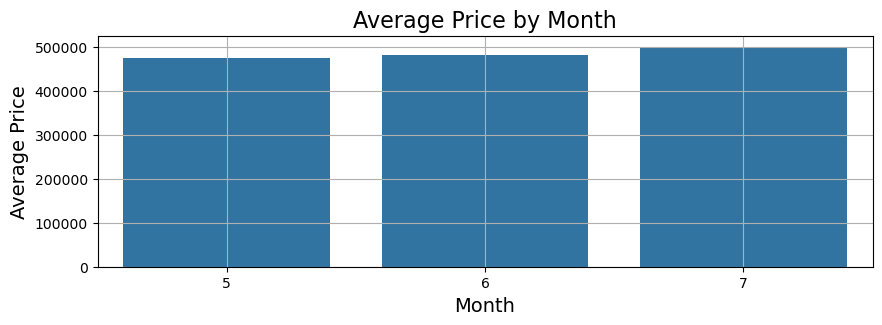

In [172]:
# Bar plot for price vs month
plt.figure(figsize=(10, 3))
sns.barplot(x='month', y='price', data=df, errorbar=None)
plt.title('Average Price by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.grid(True)
plt.show()

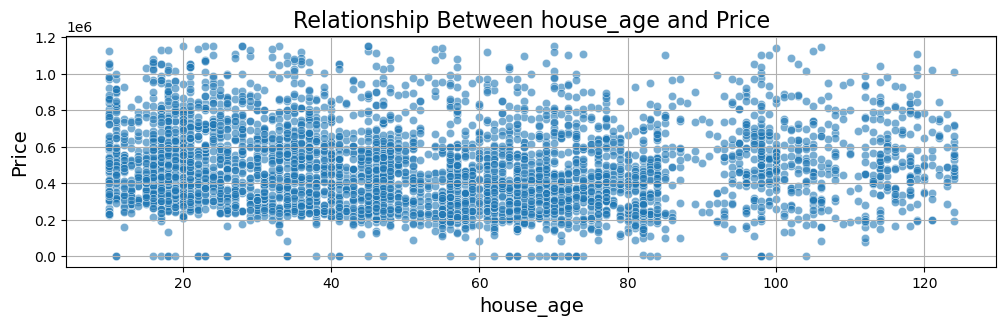

In [173]:
# Plot between price and house_age
plt.figure(figsize=(12, 3))
sns.scatterplot(x='house_age', y='price', data=df, alpha=0.6)
plt.title(f'Relationship Between house_age and Price', fontsize=16)
plt.xlabel('house_age', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

In [174]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'city' column
#df['city_encoded'] = label_encoder.fit_transform(df['city'])

# Extract ZIP codes from the `statezip` column
df['zip'] = df['statezip'].str.split().str[1]

# Encode the ZIP codes
label_encoder = LabelEncoder()
df['zip_encoded'] = label_encoder.fit_transform(df['zip'])

# Scaling numerical features
scaler = StandardScaler()

# List of features to scale
features_to_scale = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
    'month', 'week_of_month', 'house_age',
]

# Apply scaling to the selected features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Check the transformations
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,statezip,country,month,week_of_month,house_age,zip,zip_encoded
0,2014-05-02,313000.0,-0.404730,-0.829364,-0.850818,-0.186052,0.008976,0,0,3,...,1.219118,18810 Densmore Ave N,Shoreline,WA 98133,USA,-1.106913,-1.346681,0.538426,98133,62
2,2014-05-02,342000.0,-0.404730,-0.139546,-0.132879,-0.074128,-0.922823,0,0,4,...,-0.827385,26206-26214 143rd Ave SE,Kent,WA 98042,USA,-1.106913,-1.346681,0.165236,98042,26
3,2014-05-02,420000.0,-0.404730,0.205363,-0.047700,-0.182779,-0.922823,0,0,4,...,-0.827385,857 170th Pl NE,Bellevue,WA 98008,USA,-1.106913,-1.346681,0.267015,98008,7
4,2014-05-02,550000.0,0.723545,0.550272,-0.120710,-0.114265,-0.922823,0,0,4,...,1.205849,9105 170th Ave NE,Redmond,WA 98052,USA,-1.106913,-1.346681,-0.174028,98052,31
5,2014-05-02,490000.0,-1.533005,-1.519181,-1.410566,-0.228546,-0.922823,0,0,3,...,1.207890,522 NE 88th St,Seattle,WA 98115,USA,-1.106913,-1.346681,1.115175,98115,54


In [175]:
# Delete unnecesessary features
df = df.drop(columns = ['date', 'statezip', 'country', 'street', 'week_of_month', 'month', 'house_age', 'city', 'zip'])

### Feature Importance

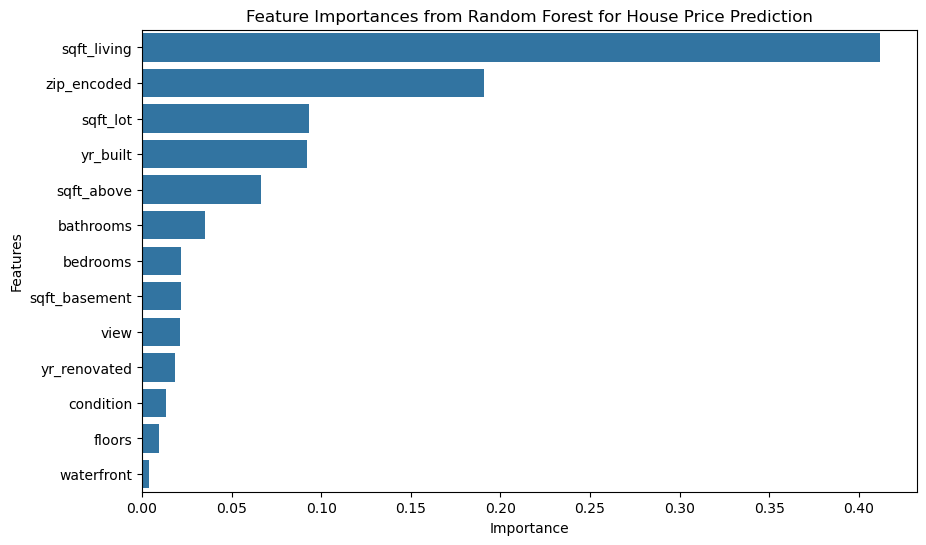

In [176]:
# Define features and target
X = df.drop(columns=['price'])  
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest for House Price Prediction')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### Processed Data Saving

In [177]:
# # Create the data/processed directory if not exists
os.makedirs('../data/processed', exist_ok=True)

# # Saving the Dataframe as a csv
df.to_csv('../data/processed/house_price_prediction.csv', index=False) 